In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# MNIST 2 Layer

In [3]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_MNIST_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(160, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [4]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.97255, 0.9797, 0.9824833333333334, 0.986566...","[0.9678, 0.9726, 0.9744, 0.9778, 0.9781, 0.980...",0.998467,0.9788
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9719, 0.9800166666666666, 0.984, 0.98586666...","[0.9685, 0.9724, 0.9776, 0.978, 0.9789, 0.9781...",0.998383,0.9813
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9712666666666666, 0.9800666666666666, 0.983...","[0.9688, 0.9748, 0.975, 0.9778, 0.9796, 0.9785...",0.999083,0.9810
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.9721666666666666, 0.978, 0.9831, 0.98578333...","[0.9693, 0.9717, 0.9752, 0.9756, 0.9775, 0.975...",0.998217,0.9783
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.972, 0.9782, 0.9836833333333334, 0.98665, 0...","[0.9663, 0.9724, 0.9757, 0.9769, 0.9761, 0.976...",0.998133,0.9798
...,...,...,...,...,...,...,...,...
155,16,50,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.6632666666666667, 0.6895333333333333, 0.700...","[0.673, 0.6974, 0.7083, 0.7135, 0.7971, 0.8086...",0.956417,0.9583
156,16,60,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.7178, 0.7378333333333333, 0.74385, 0.749283...","[0.7262, 0.7434, 0.7463, 0.7518, 0.7936, 0.819...",0.864867,0.8617
157,16,70,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.83715, 0.87905, 0.89205, 0.9017, 0.90768333...","[0.8494, 0.8889, 0.8999, 0.9082, 0.9147, 0.918...",0.958783,0.9589
158,16,80,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.8507, 0.8822833333333333, 0.8937, 0.9023, 0...","[0.8564, 0.8898, 0.9005, 0.9081, 0.913, 0.9208...",0.958883,0.9595


In [5]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.998323,0.97932,0.000309,0.001157
1,2,0.147912,0.14556,0.123734,0.119717
2,3,0.958067,0.95765,0.000401,0.000497
3,4,0.915583,0.91511,0.054293,0.055409
4,5,0.998043,0.97892,0.000340,0.001494
5,6,0.098717,0.09800,0.000000,0.000000
6,7,0.958627,0.95821,0.000423,0.000572
7,8,0.917437,0.91694,0.053390,0.054374
8,9,0.998530,0.97994,0.000330,0.000964
9,10,0.310728,0.30697,0.166260,0.163531


In [6]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

9.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


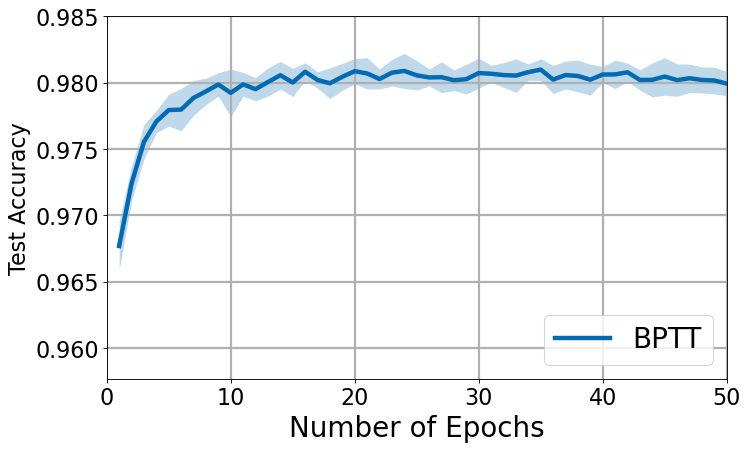

In [7]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# MNIST 3 Layers

In [8]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_MNIST_3Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(160, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [9]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.9683833333333334, 0.9768166666666667, 0.982...","[0.9641, 0.9715, 0.9749, 0.9768, 0.9791, 0.980...",0.999717,0.9807
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.96865, 0.9785166666666667, 0.98276666666666...","[0.9652, 0.972, 0.9754, 0.9769, 0.9774, 0.9794...",0.999617,0.9797
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.96745, 0.9789333333333333, 0.98425, 0.98623...","[0.9643, 0.9715, 0.977, 0.9793, 0.9799, 0.9809...",0.999800,0.9835
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.96885, 0.9798166666666667, 0.98393333333333...","[0.9675, 0.9734, 0.9745, 0.9777, 0.9796, 0.981...",0.999883,0.9811
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.95, 'lr_decay_ste...","[0.9706666666666667, 0.9802166666666666, 0.985...","[0.9677, 0.9753, 0.9774, 0.9785, 0.9776, 0.98,...",0.999783,0.9836
...,...,...,...,...,...,...,...,...
155,16,50,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.9, 'lr_decay_step...","[0.5346666666666666, 0.64385, 0.6851, 0.70875,...","[0.5423, 0.6539, 0.6925, 0.7176, 0.7361, 0.746...",0.809883,0.8091
156,16,60,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.9, 'lr_decay_step...","[0.43291666666666667, 0.52785, 0.57075, 0.5999...","[0.4368, 0.5369, 0.5808, 0.6093, 0.6245, 0.635...",0.704117,0.7084
157,16,70,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.9, 'lr_decay_step...","[0.4427, 0.6341, 0.6867166666666666, 0.7023166...","[0.4518, 0.6485, 0.6991, 0.7125, 0.7189, 0.724...",0.756617,0.7622
158,16,80,MLP-FeedBackAlignment,"{'lr': 0.0005, 'lr_decay': 0.9, 'lr_decay_step...","[0.5710666666666666, 0.7335, 0.77835, 0.795966...","[0.5758, 0.7351, 0.7817, 0.8021, 0.8118, 0.816...",0.940850,0.9440


In [10]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.999785,0.98167,0.000084,0.001413
1,2,0.098717,0.09800,0.000000,0.000000
2,3,0.943817,0.94622,0.000575,0.000545
3,4,0.852987,0.85421,0.099262,0.099491
4,5,0.999597,0.98118,0.000175,0.000864
5,6,0.098717,0.09801,0.000000,0.000032
6,7,0.945297,0.94755,0.000526,0.000474
7,8,0.854542,0.85574,0.099352,0.099628
8,9,0.999892,0.98179,0.000039,0.000954
9,10,0.098717,0.09801,0.000000,0.000032


In [11]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

9.0

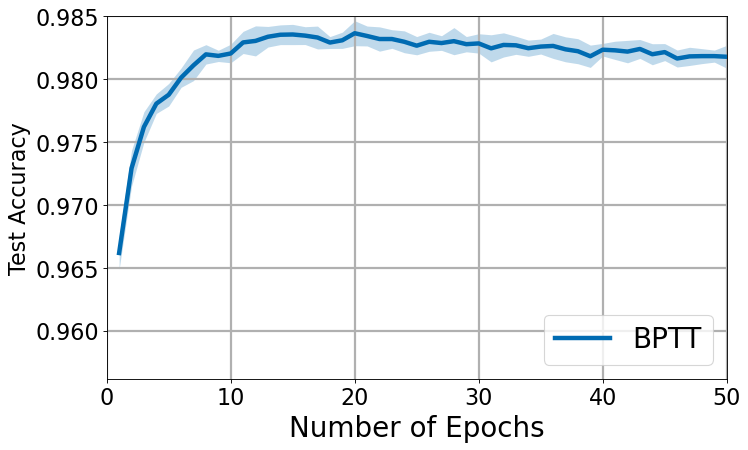

In [12]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.985])
ApplyFont(plt.gca())

# Fashion MNIST 2 Layers

In [13]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_FashionMNIST_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(160, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [14]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8629166666666667, 0.8765166666666667, 0.881...","[0.8492, 0.8596, 0.8659, 0.8645, 0.8634, 0.871...",0.940700,0.8869
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8424, 0.8683833333333333, 0.871283333333333...","[0.8233, 0.8477, 0.8531, 0.8662, 0.8691, 0.871...",0.936500,0.8826
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8592, 0.8796833333333334, 0.8793, 0.8705166...","[0.8399, 0.8613, 0.8616, 0.8539, 0.8678, 0.870...",0.927533,0.8724
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.85855, 0.8757166666666667, 0.88266666666666...","[0.8424, 0.8579, 0.8659, 0.8573, 0.8738, 0.871...",0.943583,0.8859
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.8321666666666667, 0.8768666666666667, 0.879...","[0.8201, 0.8631, 0.862, 0.8662, 0.8695, 0.8617...",0.948133,0.8882
...,...,...,...,...,...,...,...,...
155,16,50,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.74155, 0.7729333333333334, 0.78351666666666...","[0.7335, 0.765, 0.7752, 0.781, 0.7835, 0.7853,...",0.823017,0.8099
156,16,60,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.6156, 0.6565, 0.6767333333333333, 0.68315, ...","[0.6116, 0.6514, 0.6706, 0.6776, 0.6818, 0.684...",0.714233,0.7030
157,16,70,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.5667666666666666, 0.6430166666666667, 0.668...","[0.5624, 0.633, 0.6613, 0.67, 0.674, 0.6757, 0...",0.711700,0.7004
158,16,80,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.5472333333333333, 0.5733666666666667, 0.590...","[0.5361, 0.5631, 0.5778, 0.5825, 0.5939, 0.596...",0.684450,0.6711


In [15]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.939103,0.88338,0.007462,0.006097
1,2,0.119782,0.11972,0.041703,0.041574
2,3,0.867428,0.85225,0.000794,0.001221
3,4,0.773693,0.75985,0.060040,0.059177
4,5,0.937062,0.88236,0.005653,0.004611
5,6,0.100000,0.10000,0.000000,0.000000
6,7,0.868075,0.85280,0.000755,0.001287
7,8,0.774553,0.76067,0.059488,0.058597
8,9,0.944797,0.88722,0.004545,0.004566
9,10,0.127505,0.12708,0.044655,0.044047


In [16]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

9.0

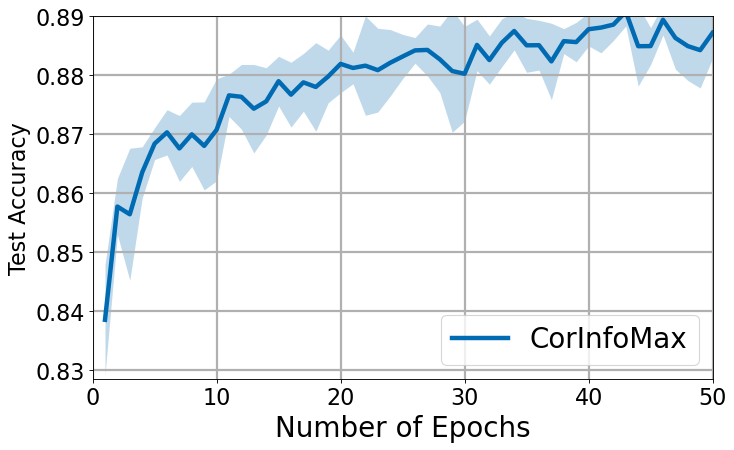

In [17]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.89])
ApplyFont(plt.gca())

# CIFAR10 2 Layers

In [18]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_CIFAR10_2Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(160, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [19]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.42458, 0.46846, 0.49544, 0.52844, 0.53454, ...","[0.4106, 0.4402, 0.4616, 0.4698, 0.4626, 0.478...",0.94230,0.5115
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.42156, 0.45806, 0.48146, 0.51222, 0.5418, 0...","[0.4048, 0.4387, 0.4434, 0.4614, 0.4755, 0.471...",0.93698,0.5084
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.43332, 0.45216, 0.48954, 0.5278, 0.55472, 0...","[0.416, 0.4323, 0.4456, 0.4736, 0.4789, 0.4738...",0.94766,0.5134
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.40378, 0.462, 0.4857, 0.52216, 0.53574, 0.5...","[0.387, 0.436, 0.4389, 0.4659, 0.466, 0.4816, ...",0.94132,0.5015
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.41804, 0.46792, 0.48958, 0.51564, 0.55276, ...","[0.4024, 0.4393, 0.4494, 0.4642, 0.4778, 0.490...",0.95118,0.5049
...,...,...,...,...,...,...,...,...
155,16,50,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.33864, 0.3938, 0.446, 0.4701, 0.48318, 0.49...","[0.3333, 0.3867, 0.4351, 0.4573, 0.4666, 0.476...",0.68562,0.5463
156,16,60,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.37534, 0.42504, 0.45404, 0.47558, 0.4859, 0...","[0.3748, 0.4215, 0.4443, 0.4627, 0.4713, 0.483...",0.69006,0.5451
157,16,70,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.3686, 0.42418, 0.45468, 0.47696, 0.48866, 0...","[0.3675, 0.4219, 0.4457, 0.4643, 0.4742, 0.483...",0.68850,0.5472
158,16,80,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.37274, 0.4276, 0.4517, 0.47338, 0.48936, 0....","[0.375, 0.4208, 0.4428, 0.4622, 0.4732, 0.4765...",0.68650,0.5423


In [20]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.942348,0.50546,0.004766,0.005443
1,2,0.751716,0.44950,0.113737,0.056712
2,3,0.683654,0.54247,0.003017,0.002182
3,4,0.684216,0.54531,0.002031,0.002577
4,5,0.938822,0.50354,0.005678,0.005022
5,6,0.747020,0.44897,0.113184,0.057396
6,7,0.688840,0.54343,0.002879,0.001724
7,8,0.689728,0.54667,0.002200,0.002436
8,9,0.945458,0.50748,0.004223,0.006062
9,10,0.756636,0.45283,0.113846,0.058492


In [21]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

9.0

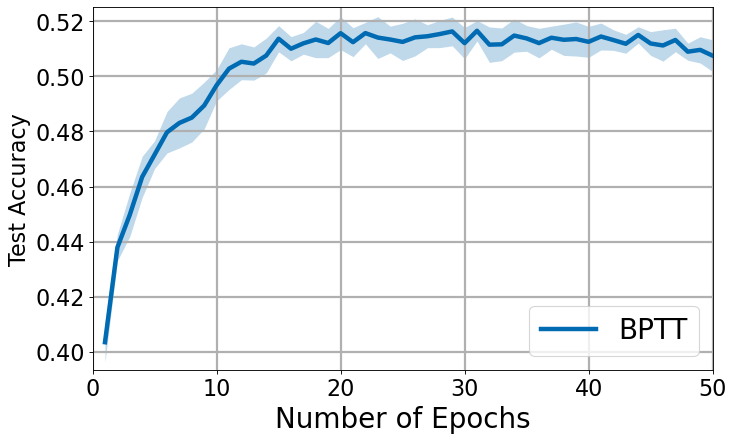

In [22]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.525])
ApplyFont(plt.gca())

# CIFAR10 3 Layers

In [23]:
df_results = pd.read_pickle(r"../Results/simulation_results_FeedbackAlignment_CIFAR10_3Layers_V1.pkl")
print(df_results.shape)
df_results.columns

(160, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [24]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.3899, 0.41554, 0.4463, 0.4743, 0.49558, 0.4...","[0.3847, 0.3978, 0.4243, 0.4394, 0.4658, 0.447...",0.93642,0.5083
1,1,10,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.33734, 0.35532, 0.41472, 0.42664, 0.41942, ...","[0.3323, 0.3351, 0.4038, 0.4029, 0.3871, 0.438...",0.89802,0.5061
2,1,20,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.3709, 0.3588, 0.41238, 0.43186, 0.46096, 0....","[0.3666, 0.3464, 0.3921, 0.4032, 0.4303, 0.432...",0.91442,0.5087
3,1,30,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.36118, 0.40852, 0.44284, 0.4574, 0.47742, 0...","[0.3561, 0.3978, 0.4174, 0.4357, 0.444, 0.4501...",0.92184,0.4940
4,1,40,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.95, 'lr_decay_step...","[0.37832, 0.42444, 0.43346, 0.45456, 0.47908, ...","[0.3782, 0.4073, 0.4015, 0.4221, 0.4434, 0.436...",0.92850,0.5053
...,...,...,...,...,...,...,...,...
155,16,50,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.3056, 0.3519, 0.4039, 0.42992, 0.44936, 0.4...","[0.3039, 0.3547, 0.4025, 0.4298, 0.45, 0.4624,...",0.68770,0.5477
156,16,60,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.32072, 0.37776, 0.40982, 0.42914, 0.44226, ...","[0.3228, 0.3758, 0.4083, 0.4264, 0.4399, 0.456...",0.67846,0.5449
157,16,70,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.32356, 0.37868, 0.41326, 0.43838, 0.45196, ...","[0.3249, 0.384, 0.4156, 0.4364, 0.4486, 0.4583...",0.68046,0.5440
158,16,80,MLP-FeedBackAlignment,"{'lr': 0.001, 'lr_decay': 0.9, 'lr_decay_step'...","[0.30722, 0.37316, 0.41186, 0.43454, 0.45114, ...","[0.3091, 0.3776, 0.4101, 0.4338, 0.4477, 0.460...",0.68246,0.5411


In [25]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std', 'Tst_ACC_std']] = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').std().reset_index()[['Trn_ACC', 'Tst_ACC']]
df_setting

,setting_number,Trn_ACC,Tst_ACC,Trn_ACC_std,Tst_ACC_std
0,1,0.917380,0.50400,0.011922,0.005626
1,2,0.673856,0.42950,0.107895,0.051777
2,3,0.651284,0.54130,0.003003,0.002313
3,4,0.676378,0.54340,0.002789,0.002116
4,5,0.914944,0.49939,0.010955,0.006261
5,6,0.663374,0.42754,0.104351,0.052960
6,7,0.658134,0.54270,0.003197,0.002284
7,8,0.684412,0.54453,0.002722,0.002210
8,9,0.920098,0.50259,0.014578,0.005598
9,10,0.684286,0.43164,0.109205,0.052545


In [26]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

9.0

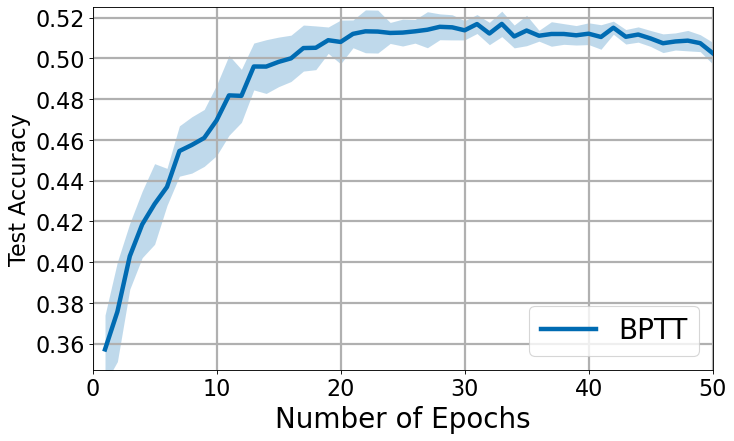

In [27]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2', label = "BPTT")
plt.fill_between(x, mean_ - std_data, mean_ + std_data, alpha=0.25, linewidth=0, color='#006BB2')

SetPlotRC()
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
# plt.title("CorInfoMax Test Accuracy on MNIST")
plt.legend(fontsize = 25, loc = "lower right")
plt.axis([0.0,50,mean_[0] - 0.01,0.525])
ApplyFont(plt.gca())

# CIFAR100 3 Layers